<a href="https://colab.research.google.com/github/LeoSotoG/Bank-Customer-Segmentation/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyect

El proyecto de Bank Customer Segmentation se enfoca en dividir a los clientes de un banco en grupos homogéneos basados en características similares. Este enfoque permite a los bancos entender mejor las necesidades y preferencias de sus clientes, lo que a su vez les ayuda a ofrecer productos y servicios más personalizados y a desarrollar estrategias de marketing más efectivas.

El conjunto de datos contiene información sobre el comportamiento y las transacciones de los clientes bancarios.

##Column Information

* **CUST_ID** ID del cliente
* **BALANCE:** Saldo total de la cuenta del cliente.
* **BALANCE FREQUENCY:** Frecuencia de actualización del saldo.
* **PURCHASES:** Monto total de compras realizadas por el cliente.
* **ONEOFF PURCHASES:** Monto de compras realizadas en un único pago.
* **INSTALLMENT PURCHASES:** Monto de compras pagadas en cuotas.
* **CASH ADVANCE:** Total de avances en efectivo tomados por el cliente.
* **PURCHASES FREQUENCY:** Frecuencia de compras.
* **ONEOFF PURCHASES FREQUENCY:** Frecuencia de compras únicas.
* **PURCHASES INSTALLMENTS FREQUENCY:** Frecuencia de compras a plazos.
* **CASH ADVANCE FREQUENCY:** Frecuencia de avances en efectivo.
* **CASH ADVANCE TRX:** Número de transacciones de avances en efectivo.
* **PURCHASES TRX:** Número de transacciones de compra.
* **CREDIT LIMIT:** Límite de crédito del cliente.
* **PAYMENTS:** Pagos totales realizados por el cliente.
* **MINIMUM PAYMENTS:** Pagos mínimos realizados por el cliente.
* **PRC FULL PAYMENT:** Porcentaje de pago completo realizado por el cliente.
* **TENURE:** Número de meses como cliente.

##Load Libraries

In [88]:
!pip install kneed

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Para imputación
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp

# Para los outliers
from sklearn.ensemble import IsolationForest

# Para el preprocesamiento
from sklearn.preprocessing import StandardScaler

# Para el modelo
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

# Evaluar modelo
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

##Load Data

In [90]:
data = pd.read_csv("Bank Customer Segmentation.csv")

In [91]:
data.shape

(8950, 18)

In [92]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [93]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [94]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##Data processing

###Split variables

**La unica variable categorica que existe es "CUST_ID" y no sera relevante de momento en el modelo**

In [95]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [96]:
# Variables numericas
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

###Imputation of null data

**Imputación en variables numericas con (Prueba de Kolmogorov-Smirnov)**

In [97]:
# Variables a imputar numericas
vn_nulas = ["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]

In [98]:
# Definir imputador por promedio
im = SimpleImputer(strategy = "mean")

Prueba de Kolmogorov-Smirnov

In [99]:
for col in vn_nulas:
  # Descargando la columna
  X = data[[col]]
  # Imputando los datos
  Xi = pd.DataFrame(im.fit_transform(X), columns=[col])
  #Estadistico de prueba
  if ks_2samp(X[col].dropna(),Xi[col]).statistic < 0.1:
    print(f"La imputación en la columna {col} fue correcta")
    # Haciendo la imputacion en el DataFrame original
    data[col] = im.transform(data[[col]].copy())
  else:
    print(f"La imputación en la columna {col} NO fue correcta")

La imputación en la columna CREDIT_LIMIT fue correcta
La imputación en la columna MINIMUM_PAYMENTS fue correcta


###Outliers

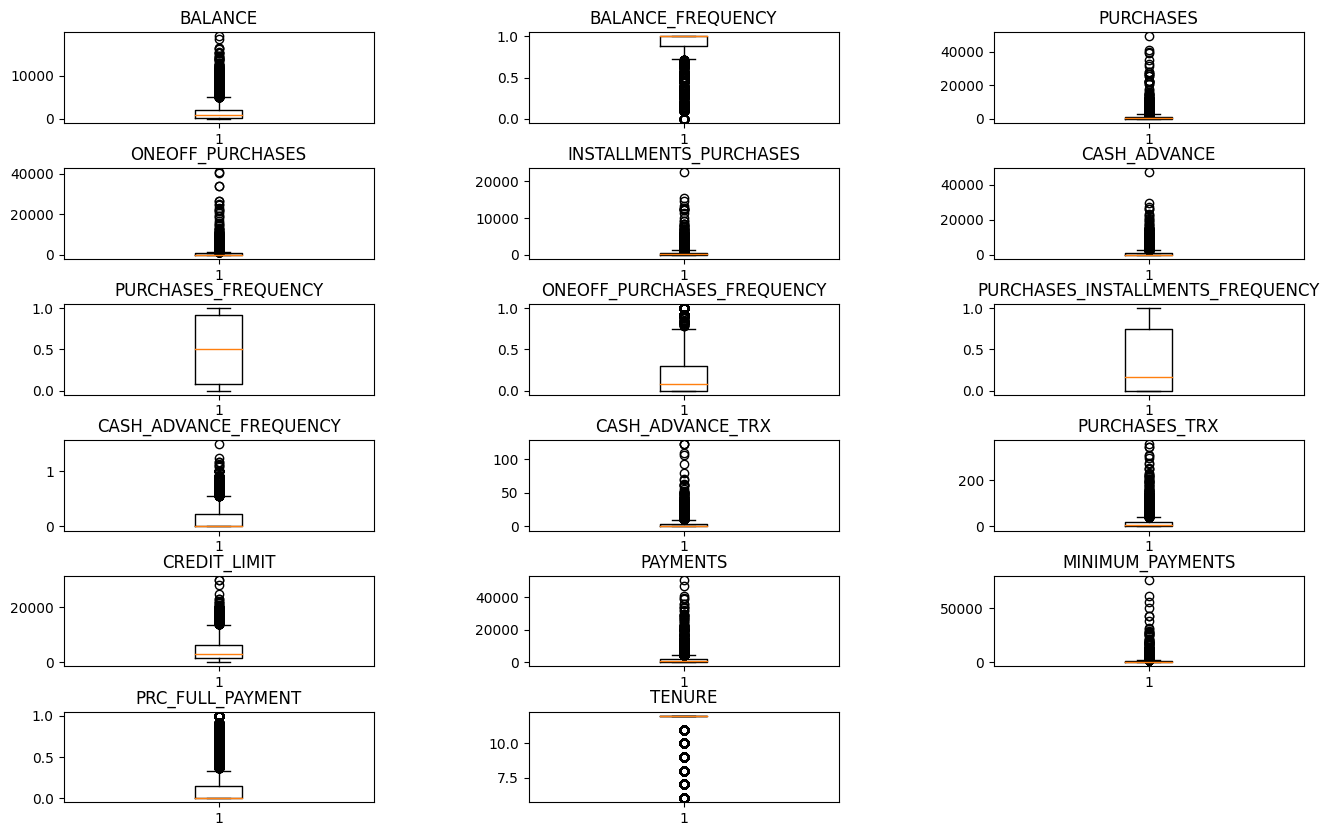

In [100]:
# Definiendo una figura para ver las subfiguras e identificar si cuenta con outliers
fig = plt.figure(figsize=(16, 10))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(6, 3, i+1)
  ax.boxplot(data[col])
  ax.set_title(col)

# Ajustar espacio entre subfiguras
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Se puede visualizar la existencia de outliers

####IsolationForest

In [101]:
#Variables a imputar
var_outliers = ["BALANCE","BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES",
                "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "ONEOFF_PURCHASES_FREQUENCY",
                "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX",
                "CREDIT_LIMIT", "PAYMENTS","MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]

numerical_data = data[var_outliers]

In [102]:
# Entrenamiento del modelo de Isolation Forest
clf = IsolationForest(contamination=0.2)  # contamination es la proporción esperada de outliers
clf.fit(numerical_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.2)

In [103]:
# Predicción de outliers (1 indica que es normal, -1 indica que es un outlier)
predicciones = clf.predict(numerical_data)
print("Predicciones de outliers:", predicciones)

Predicciones de outliers: [ 1  1  1 ... -1 -1 -1]


In [104]:
# Identificación de los índices de los outliers
outliers_indices = numerical_data[predicciones == -1].index
print("Índices de los outliers:", outliers_indices)

Índices de los outliers: Index([   6,   21,   23,   28,   30,   34,   36,   39,   48,   50,
       ...
       8939, 8940, 8941, 8942, 8943, 8944, 8945, 8947, 8948, 8949],
      dtype='int64', length=1790)


In [105]:
# Eliminación de outliers del DataFrame original
data = data.drop(outliers_indices)

In [106]:
data.shape # Perdimos 1790 datos

(7160, 18)

In [107]:
numerical_data = data[numerical_features]

##Exploratory Analysis

###Univariate Analysis

**Variables numericas**

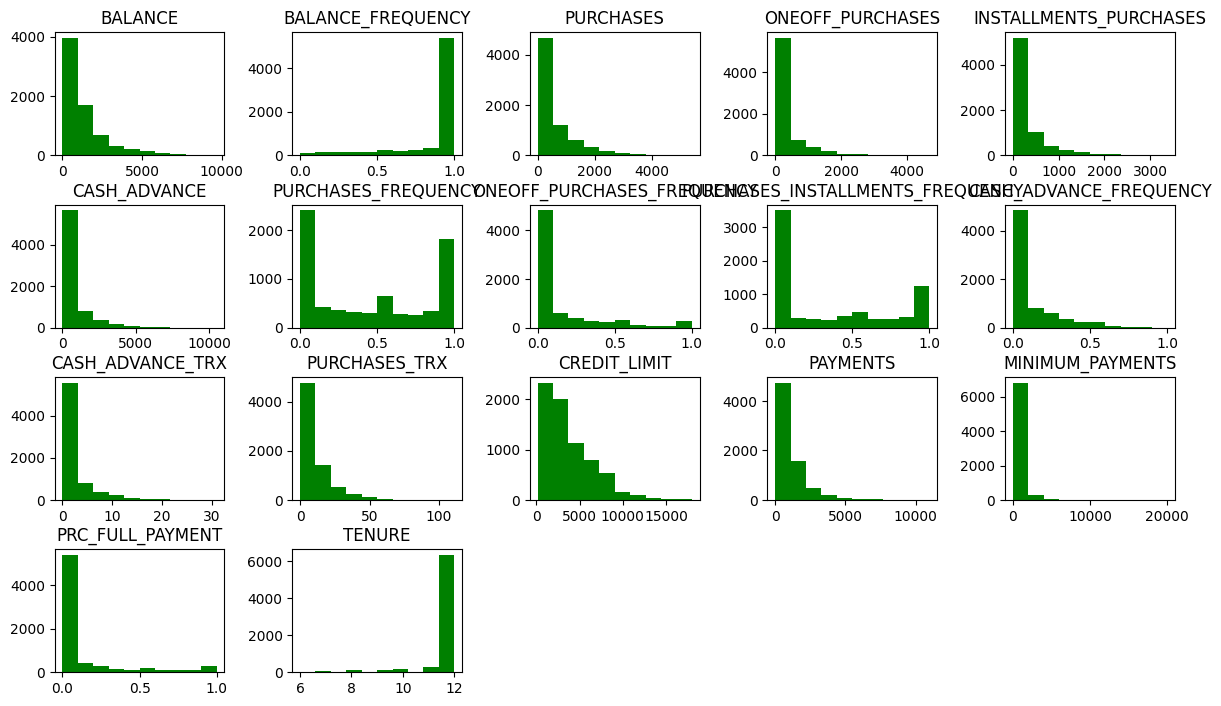

In [108]:
# Definiendo una figura para ver las subfiguras y visualizar los histogramas
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(4, 5, i+1)
  ax.hist(data[col], color="green")
  ax.set_title(col)

# Ajustando los espacios entre las subfiguras
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

##Bivariate Analysis

###Heatmap

In [109]:
# Descargar en una variable la matriz de correlación
matriz_Corr = numerical_data.corr()
matriz_Corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.361076,-0.020392,0.043913,-0.090896,0.512490,-0.192690,0.004777,-0.183442,0.455205,0.422754,-0.052173,0.418438,0.278406,0.459255,-0.347157,0.067856
BALANCE_FREQUENCY,0.361076,1.000000,0.163367,0.121504,0.125624,0.122055,0.183789,0.172884,0.133070,0.215430,0.187221,0.193375,0.074718,0.114322,0.164498,-0.116689,0.060516
PURCHASES,-0.020392,0.163367,1.000000,0.815494,0.679276,-0.224116,0.568979,0.546426,0.442051,-0.268603,-0.238892,0.702239,0.196305,0.305457,-0.025591,0.117992,0.123812
ONEOFF_PURCHASES,0.043913,0.121504,0.815494,1.000000,0.129341,-0.151245,0.286118,0.676314,0.054162,-0.169071,-0.153181,0.448171,0.190135,0.257938,-0.034633,-0.018530,0.091294
INSTALLMENTS_PURCHASES,-0.090896,0.125624,0.679276,0.129341,1.000000,-0.192503,0.612280,0.078655,0.688934,-0.245963,-0.215238,0.635227,0.095153,0.196056,-0.000088,0.225388,0.096274
CASH_ADVANCE,0.512490,0.122055,-0.224116,-0.151245,-0.192503,1.000000,-0.338571,-0.167077,-0.275071,0.629055,0.650188,-0.233776,0.219990,0.335383,0.180357,-0.200969,-0.057139
PURCHASES_FREQUENCY,-0.192690,0.183789,0.568979,0.286118,0.612280,-0.338571,1.000000,0.416227,0.879767,-0.395070,-0.343433,0.737232,0.045195,0.034905,-0.057594,0.299965,0.063060
ONEOFF_PURCHASES_FREQUENCY,0.004777,0.172884,0.546426,0.676314,0.078655,-0.167077,0.416227,1.000000,0.028858,-0.167519,-0.151494,0.493225,0.182373,0.145026,-0.052963,0.026758,0.096280
PURCHASES_INSTALLMENTS_FREQUENCY,-0.183442,0.133070,0.442051,0.054162,0.688934,-0.275071,0.879767,0.028858,1.000000,-0.329481,-0.285075,0.669612,-0.005761,0.017006,-0.031117,0.284909,0.050219
CASH_ADVANCE_FREQUENCY,0.455205,0.215430,-0.268603,-0.169071,-0.245963,0.629055,-0.395070,-0.167519,-0.329481,1.000000,0.877583,-0.260794,0.052383,0.162503,0.154572,-0.263296,-0.059192


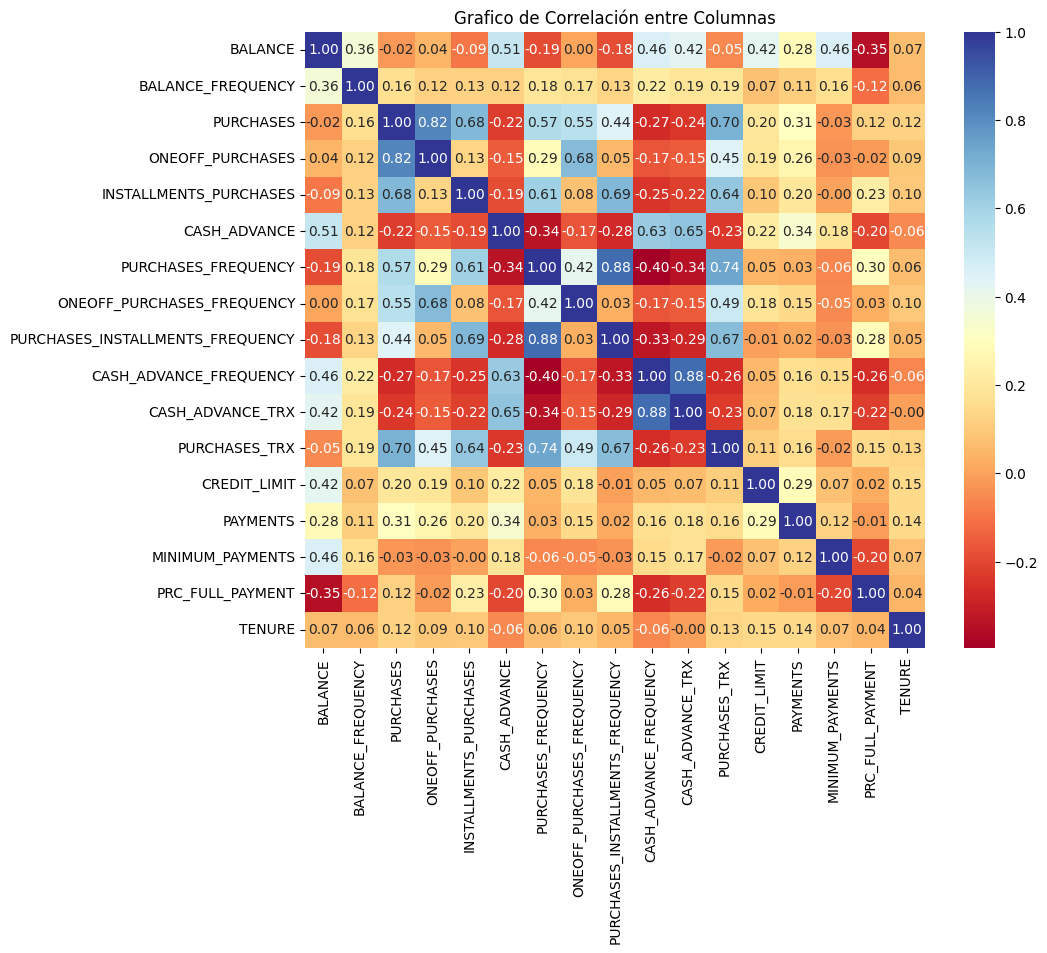

In [110]:
# Grafico de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_Corr, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Grafico de Correlación entre Columnas")
plt.show()

##Preprocess Data

###Scaler

In [111]:
# Definiendo el escalador
scaler = StandardScaler()
scaler.fit(numerical_data)

StandardScaler()

In [112]:
# Escalando datos numericos
numerical_data_preprocessed = scaler.fit_transform(numerical_data)

In [113]:
data_preprocessed = pd.DataFrame(numerical_data_preprocessed, columns = [numerical_features])

##Model Data

###K-means

In [114]:
# Descargando el dataframe en otro
X = data_preprocessed

####Elbow Method

In [115]:
# Inicialización de la lista WCSS
wcss = []

# Bucle for para diferentes valores de k
for i in range(1, 15):
    # Creación del objeto KMeans con el número actual de clústeres i
    # Se utiliza la estrategia de inicialización 'k-means++' y se fija la semilla aleatoria en 0
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

    # Ajuste del modelo KMeans a los datos X
    kmeans.fit(X)

    # Cálculo de la suma de los cuadrados de las distancias dentro de los clústeres (WCSS)
    # y se agrega a la lista wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

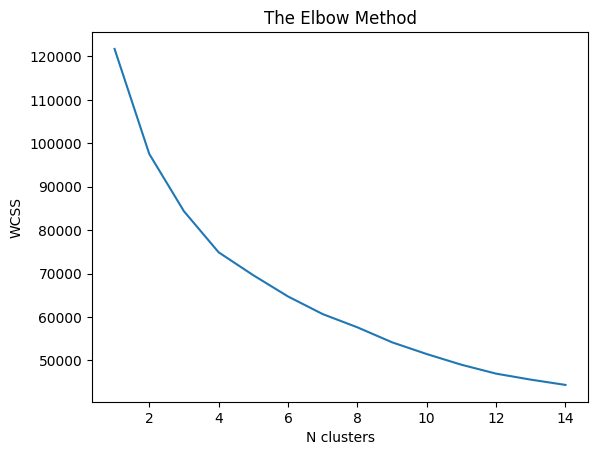

In [116]:
plt.plot(range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("N clusters")
plt.ylabel("WCSS")
plt.show()

####Knee Locator

El knee locator es una técnica para encontrar el número óptimo de clústeres en clustering. Se basa en identificar el "codo" en el gráfico de la suma de las distancias cuadradas intra-clúster versus el número de clústeres. Este "codo" indica el punto donde agregar más clústeres no mejora significativamente la calidad del clustering.

In [117]:
# Crear un objeto KneeLocator para identificar el punto de inflexión (codo)
# range(1, 15): Valores de k (número de clústeres)
# wcss: Valores de la suma de las distancias cuadradas intra-clúster
# curve="convex": Especifica la forma de la curva (en este caso, convexa)
# direction="decreasing": Especifica la dirección de la curva (en este caso, decreciente)
kneedle = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")

# Obtener la posición del codo identificado por KneeLocator
elbow_point = kneedle.elbow

# Imprimir la posición del codo
elbow_point

4

In [118]:
# Descargando el dataframe en otro
A = data_preprocessed

In [119]:
# Crear un modelo KMeans
kmeansmodel = KMeans(n_clusters=elbow_point, init= "k-means++", random_state=0)
# Entrenar el modelo y obtener la asignación de clústeres
clustersk = kmeansmodel.fit_predict(A)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



####Visualize K-means Model

In [120]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A)

In [121]:
# Graficacion
# Crear un DataFrame con los datos reducidos por PCA y la asignación de clústeres
visualizacion = pd.DataFrame({"Componente Principal 1": A_pca[:, 0],
                              "Componente Principal 2": A_pca[:, 1],
                              "Cluster": clustersk})

# Graficar los datos con px.scatter
fig = px.scatter(visualizacion, x="Componente Principal 1", y="Componente Principal 2", color="Cluster",
                 title="Clustering con KMeans y PCA",
                 labels={"Componente Principal 1": "Componente Principal 1",
                         "Componente Principal 2": "Componente Principal 2"},
                 color_continuous_scale=px.colors.qualitative.Set3)

# Mostrar la figura
fig.show()

###Gaussian Mixture Models (GMM)

####Elbow Method


In [122]:
# Descargando el dataframe en otro
G = data_preprocessed

In [123]:
# Inicialización de la lista WCSS
bic_values = []

# Bucle for para diferentes valores de n
for i in range(1, 15):
    # Creación del objeto con el número actual de componentes i
    # Se fija la semilla aleatoria en 0
    gaussianM = GaussianMixture(n_components=i , random_state=0)

    # Ajuste del modelo a los datos X
    gaussianM.fit(G)

    # Cálculo de la suma de los cuadrados de las distancias dentro de los clústeres (WCSS)
    # y se agrega a la lista wcss
    bic_values.append(gaussianM.bic(G))


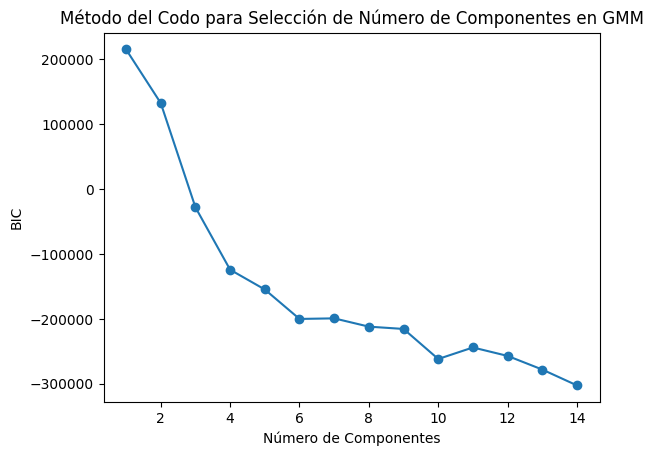

In [124]:
# Visualizando el grafico
plt.plot(range(1, 15), bic_values, marker='o')
plt.title("Método del Codo para Selección de Número de Componentes en GMM")
plt.xlabel("Número de Componentes")
plt.ylabel("BIC")
plt.show()

####Knee Locator

In [125]:
# Crear un objeto KneeLocator para identificar el punto de inflexión (codo)
# range(1, 15): Valores de n_componentes (número de componentes en GMM)
# bic_values: Valores de BIC
# curve="convex": Especifica la forma de la curva (en este caso, convexa)
# direction="decreasing": Especifica la dirección de la curva (en este caso, decreciente)
kneedle = KneeLocator(range(1, 15), bic_values, curve="convex", direction="decreasing")

# Obtener la posición del codo identificado por KneeLocator
elbow_point = kneedle.elbow

# Imprimir la posición del codo
print("Número óptimo de componentes (codo):", elbow_point)

Número óptimo de componentes (codo): 6


In [126]:
# Crear un modelo GaussianMixture
gmm_model = GaussianMixture(n_components=elbow_point , random_state=0)
# Entrenar el modelo y obtener la asignación de clústeres
cl = gmm_model.fit_predict(G)

####Visualize GMM

In [127]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
G_pca = pca.fit_transform(G)

In [128]:
# Graficacion
# Crear un DataFrame con los datos reducidos por PCA y la asignación de clústeres
visualizacion = pd.DataFrame({"Componente Principal 1": G_pca[:, 0],
                              "Componente Principal 2": G_pca[:, 1],
                              "Cluster": cl})

# Graficar los datos con px.scatter
fig = px.scatter(visualizacion, x="Componente Principal 1", y="Componente Principal 2", color="Cluster",
                 title="Clustering con KMeans y PCA",
                 labels={"Componente Principal 1": "Componente Principal 1",
                         "Componente Principal 2": "Componente Principal 2"},
                 color_continuous_scale=px.colors.qualitative.Set3)

# Mostrar la figura
fig.show()

###DBScan

In [129]:
# Descargando el dataframe en otro
D = data_preprocessed

In [130]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
D_pca = pca.fit_transform(D)

# Crear un objeto DBSCAN y ajustarlo a los datos en 2D
dbscan = DBSCAN(eps=0.3, min_samples=8)  # Ajusta los parámetros según tus datos
clustersD = dbscan.fit_predict(D_pca)

In [131]:
# Graficacion
# Crear un DataFrame con los datos reducidos por PCA y la asignación de clústeres
visualizacion = pd.DataFrame({"Componente Principal 1": D_pca[:, 0],
                              "Componente Principal 2": D_pca[:, 1],
                              "Cluster": clustersD})

# Graficar los datos con px.scatter
fig = px.scatter(visualizacion, x="Componente Principal 1", y="Componente Principal 2", color="Cluster",
                 title="Clustering con KMeans y PCA",
                 labels={"Componente Principal 1": "Componente Principal 1",
                         "Componente Principal 2": "Componente Principal 2"},
                 color_continuous_scale=px.colors.qualitative.Set3)

# Mostrar la figura
fig.show()

###Model evaluation

In [132]:
# Descargando el dataframe en otro
E = data_preprocessed

####Silhouette Coefficient

Se busca obtener un valor cercano a +1, lo que indica que los clústeres están bien definidos y separados.

* Cerca de +1: Indica que la muestra está bien asignada a su clúster y mal asignada a los otros clústeres, lo que sugiere una buena separación entre los clústeres.
* Cerca de 0: Indica que la muestra está cerca del límite de decisión entre dos clústeres, o que podría estar en un área de solapamiento entre clústeres.
* Cerca de -1: Indica que la muestra podría haber sido asignada al clúster incorrecto, lo que sugiere una mala separación entre los clústeres.

**K-means**

In [133]:
silhouette = silhouette_score(E, clustersk)
print("Coeficiente de Silueta:", silhouette)

Coeficiente de Silueta: 0.19449314424611197


**GMM**

In [134]:
silhouette = silhouette_score(E, cl)
print("Coeficiente de Silueta:", silhouette)

Coeficiente de Silueta: 0.08082208264887634


**DBScan**

In [135]:
silhouette = silhouette_score(E, clustersD)
print("Coeficiente de Silueta:", silhouette)

Coeficiente de Silueta: 0.11680088606142297


####Davies-Bouldin Index

En general, los valores del Índice Davies-Bouldin pueden variar entre 0 y un valor superior, donde valores cercanos a 0 indican una mejor calidad de clústeres. Por lo tanto, cuanto más cercano a 0 sea el valor del Índice Davies-Bouldin, mejor será la partición de los datos en clústeres coherentes y bien separados.

Una interpretación más concreta puede ser:

* Valores menores a 0.5: Indican una partición muy buena.
* Valores entre 0.5 y 1: Indican una partición aceptable.
* Valores mayores a 1: Indican una partición deficiente.

**K-means**

In [136]:
db_index = davies_bouldin_score(E, clustersk)
print("Índice Davies-Bouldin:", db_index)

Índice Davies-Bouldin: 1.6441709371246667


**GMM**

In [137]:
db_index = davies_bouldin_score(E, cl)
print("Índice Davies-Bouldin:", db_index)

Índice Davies-Bouldin: 3.4900992449852413


**DBScan**

In [138]:
db_index = davies_bouldin_score(E, clustersD)
print("Índice Davies-Bouldin:", db_index)

Índice Davies-Bouldin: 2.678509599615566


####Calinski-Harabasz index:

Se busca obtener un valor alto, lo que indica que los clústeres están bien definidos y separados.

* Valores más altos del índice de Calinski-Harabasz indican una mejor calidad de los clústeres.
* Valores más bajos del índice de Calinski-Harabasz sugieren una menor separación entre los clústeres y una mayor dispersión dentro de los clústeres.

La interpretación de los valores específicos puede variar según el problema y el conjunto de datos.

**K-means**

In [139]:
ch_index = calinski_harabasz_score(E, clustersk)
print("Índice de Calinski-Harabasz:", ch_index)

Índice de Calinski-Harabasz: 1491.673715334406


**GMM**

In [140]:
ch_index = calinski_harabasz_score(E, cl)
print("Índice de Calinski-Harabasz:", ch_index)

Índice de Calinski-Harabasz: 454.1713298804348


**DBScan**

In [141]:
ch_index = calinski_harabasz_score(E, clustersD)
print("Índice de Calinski-Harabasz:", ch_index)

Índice de Calinski-Harabasz: 61.03226848463128


Dado los resultados proporcionados, podemos realizar las siguientes observaciones:

* K-means parece tener el mejor desempeño en términos de Coeficiente de Silueta y Índice de Calinski-Harabasz, mientras que el Índice Davies-Bouldin es ligeramente más alto que los otros dos modelos, pero aún así es razonable.
* GMM tiene un Coeficiente de Silueta más bajo en comparación con K-means, lo que sugiere una separación menos clara entre los clústeres.
*DBscan tiene un Coeficiente de Silueta y un Índice de Calinski-Harabasz más bajos en comparación con K-means y GMM, lo que indica una separación menos clara entre los clústeres y una menor cohesión dentro de los clústeres.

En general, basándonos en estas métricas y considerando el objetivo del clustering en tu problema específico, K-means podría considerarse como la opción más óptima entre los tres modelos.

##Conclusions

In [142]:
# Copiando el dataset inicial
R = data.copy()

R["clusters"] = clustersk

R.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


Apartir de esto se pueden segemetar cosas importantes de los clientes como obtener:

In [143]:
promedios = R.groupby(["clusters"])[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].mean().reset_index()

In [144]:
promedios

,clusters,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,3159.768236,0.969689,181.006038,105.275128,75.759628,2429.626282,0.166661,0.060009,0.108260,0.356226,8.287014,3.083540,5318.665564,1861.488957,1271.259242,0.021558,11.748553
1,1,514.775329,0.893837,671.844588,78.966433,593.617432,114.970321,0.860082,0.053298,0.812178,0.026304,0.476874,15.965444,3146.318179,817.725944,480.322751,0.282315,11.669325
2,2,843.849975,0.789094,209.392141,159.340883,50.217603,361.139657,0.169964,0.084009,0.083623,0.081751,1.347269,2.701281,2972.090357,697.442196,462.927422,0.061753,11.616655
3,3,1409.372201,0.973534,1785.699529,1242.233804,543.510109,209.295514,0.838505,0.599664,0.494589,0.043040,0.761775,27.099638,5226.865119,1757.751298,580.715130,0.143532,11.951087


In [145]:
cantidad = R.groupby(["clusters"])[["CUST_ID"]].count().reset_index()

Cantidad de clientes por tipo de cliente

In [146]:
cantidad

,clusters,CUST_ID
0,0,1209
1,1,1881
2,2,2966
3,3,1104


**Cliente 0**

In [147]:
print(promedios[promedios["clusters"] == 0])

   clusters      BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
0         0  3159.768236           0.969689  181.006038        105.275128   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               75.759628   2429.626282             0.166661   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.060009                           0.10826   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.356226          8.287014        3.08354   5318.665564   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  1861.488957       1271.259242          0.021558  11.748553  


**Cliente 1**

In [148]:
print(promedios[promedios["clusters"] == 1])

   clusters     BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
1         1  514.775329           0.893837  671.844588         78.966433   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1              593.617432    114.970321             0.860082   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                    0.053298                          0.812178   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                0.026304          0.476874      15.965444   3146.318179   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
1  817.725944        480.322751          0.282315  11.669325  


**Cliente 2**

In [149]:
print(promedios[promedios["clusters"] == 2])

   clusters     BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
2         2  843.849975           0.789094  209.392141        159.340883   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2               50.217603    361.139657             0.169964   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                    0.084009                          0.083623   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                0.081751          1.347269       2.701281   2972.090357   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
2  697.442196        462.927422          0.061753  11.616655  


**Cliente 3**

In [150]:
print(promedios[promedios["clusters"] == 3])

   clusters      BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
3         3  1409.372201           0.973534  1785.699529       1242.233804   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3              543.510109    209.295514             0.838505   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                    0.599664                          0.494589   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.04304          0.761775      27.099638   5226.865119   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
3  1757.751298         580.71513          0.143532  11.951087  


Teniendo asi 4 tipos de clientes a los cuales se les puede asignar incluso nombres diferentes dependiendo del promedio de su información como fue en este caso, pero depende de los datos debido a que se pueden tener mas información categorica y asi segmentarlos de manera diferente y asi poder implementar tecnicas de marketing o ofrecer servicios diferentes a cada tipo de cliente.Este enfoque permite a los bancos personalizar sus servicios, productos y estrategias de marketing para satisfacer las necesidades específicas de cada segmento de clientes.